In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv("bigmart_train.csv")
test = pd.read_csv("bigmart_test.csv")

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape

(8523, 12)

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
test.shape

(5681, 11)

In [8]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [12]:
#combime test and train into one file to perform EDA
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train,test],ignore_index=True)
print(data.shape)

(14204, 13)


In [14]:
data.head()
# target variable is "Item_Outlet_Sales"

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [16]:
# Numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
#checking missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
data["Item_Fat_Content"].unique()
#only 2 unique types

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
data["Outlet_Establishment_Year"].unique()
#year is range from 1985 to 2009

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [22]:
#Calculate the Outlet_age
data["Outlet_Age"] = 2018 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [23]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

**Note:** there are missing values as well - "nan"

In [25]:
#print counting values
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [27]:
data["Outlet_Size"].value_counts()
#majority of outlets are medium and small - scale

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [29]:
#use mode func to find out the most common value
data["Outlet_Size"].mode()[0]

'Medium'

In [31]:
#Item_Weight and Outlet_size are having missing values
#Replace missing values in Outlet_size with "medium"
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [32]:
#Replace missing values in Item_Weight with mean weight
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot:>

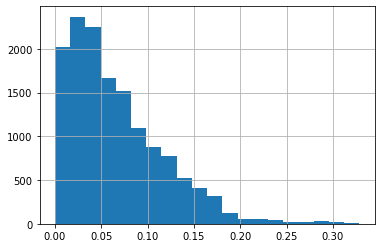

In [34]:
#Plot the histogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins=20)

**Detect Outliers:**
<br>
A common rule in stats is more than 1.5*IQR. Or above 3rd quartile or below the 1st quartile

In [37]:
#calculate the first quantile
Q1 = data["Item_Visibility"].quantile(0.25)
Q3 = data["Item_Visibility"].quantile(0.75)

In [38]:
#calculate the IQR
IQR = Q3 - Q1

In [41]:
#remove the outliers, and store in fill_data
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [42]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [46]:
#data without outliers
fill_data.shape

(13943, 14)

In [45]:
#the original data 
data.shape

(14204, 14)

In [47]:
data = fill_data

In [49]:
data.shape

(13943, 14)

In [57]:
#convert Visibility to numerical values
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"],[0.000, 0.065, 0.13, 0.2], labels=['Low Viz','Viz','High Viz'])

In [58]:
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [59]:
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex= True)

In [61]:
#clean Item_Fat_Content
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace("reg", "Regular")

In [62]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Sklearn: Label Encoder

In [63]:
le = LabelEncoder()

In [ ]:
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])
data["Item_Visibility_bins"] = le.fit_transform(data["Item_Visibility_bins"])
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])

In [68]:
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [69]:
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [70]:
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [71]:
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [74]:
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x:x[0:2])
# only the first two letters "FD"/"NC"/"DR"
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({'FD': 'Food',
                                                            'NC': 'Non-Consumable',
                                                            'DR': 'Drinks'})

In [75]:
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [115]:
data.shape

(13943, 24)

In [ ]:
#one-hot encoding for all the numerical values, not categorical values
data = pd.get_dummies(data, columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type", "Item_Type_Combined"])

In [117]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                        int64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_Combined_Food                uint8
Item_Type_Combined_Non-Consumable      uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Typ

In [ ]:
# Drop converted columns
data.drop(["Item_Type","Outlet_Establishment_Year"], axis=1, inplace= True)

In [ ]:
#split the dataset
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

In [91]:
#drop target and source columns
test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace= True)
train.drop(["source"], axis=1, inplace= True)

In [119]:
#save after modified
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

### Using cleaned dataset

In [120]:
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [121]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                        int64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                  object
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_Combined_Non-Consumable      int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Typ

In [129]:
X_train = train2.drop(["Item_Outlet_Sales","Outlet_Identifier","Item_Identifier","Item_Visibility_bins"], axis=1)
y_train = train2.Item_Outlet_Sales

In [130]:
X_test = test2.drop(["Outlet_Identifier","Item_Identifier","Item_Visibility_bins"], axis=1)

In [131]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,1,107.8622,19,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,8.300000,1,87.3198,11,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
2,14.600000,2,241.7538,20,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
3,7.315000,1,155.0340,11,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,12.792854,2,234.2300,33,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,1,141.3154,21,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0
5564,7.600000,0,169.1448,9,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
5565,10.000000,2,118.7440,16,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
5566,15.300000,3,214.6218,11,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [103]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,1,249.8092,19,Low Viz,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,5.92,1,48.2692,9,Low Viz,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0


In [132]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [133]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train,y_train, test_size=0.3,random_state=42)

In [134]:
lin = LinearRegression()

In [135]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [136]:
print(lin.coef_)
lin.intercept_

[-1.90036465e+00  6.47642051e-01  1.58765803e+01 -3.18305957e+01
 -1.17986411e+00  1.17986411e+00  1.88289291e+02  4.85190876e+01
 -2.36808378e+02  5.38389628e+02 -3.10342711e+02 -2.28046917e+02
  9.08650175e+00  3.36707800e+01 -4.27572818e+01 -1.63996949e+03
 -1.24502113e+02 -3.46134013e+02  2.11060561e+03]


913.7661829287026

In [138]:
predictions = lin.predict(xtest)
predictions

array([2094.03206732, 3692.21544443, 2945.61305245, ..., 3547.14571063,
       3487.75758304, 1265.38006418])

In [139]:
import math

In [140]:
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2078720828165


In [141]:
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1768.61819871, 1583.36896695, 1857.87011608, ..., 1841.75405423,
       3592.48212002, 1303.13097816])

In [142]:
test_pred = pd.DataFrame({
    'Item_Identifier': test2["Item_Identifier"],
    'Outlet_Identifier': test2["Outlet_Identifier"],
    'Item_Outlet_Sales': y_sales_pred},
    columns= ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
)

In [144]:
test_pred

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1768.618199
1,FDW14,OUT017,1583.368967
2,NCN55,OUT010,1857.870116
3,FDQ58,OUT017,2657.951030
4,FDY38,OUT027,5157.417285
...,...,...,...
5563,FDB58,OUT046,2340.213683
5564,FDD47,OUT018,2439.854586
5565,NCO17,OUT045,1841.754054
5566,FDJ26,OUT017,3592.482120
